In [35]:
# Imports

import torch as nn
import mne
import mne_realtime as mne_rt
import mne.epochs as pochy
import sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np

Extracting EDF parameters from C:\Users\prasa\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 43 samples (0.269 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 5281 samples (33.006 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1057 samples (6.606 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Used Annotations descriptions: ['T0', 'T1', 'T2']
Used Annotations descriptions: ['T0', 'T1', 'T2']
Ignoring annotation durations and creating fixed-duration epochs around annotation onsets.
Not setting metadata
30 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 30 events and 113 original time points ...
1 bad epochs dropped
Using data from preloaded Raw for 29 events and 113 original time points ...
Using data from preloaded Raw for 20 events and 113 original time points ...


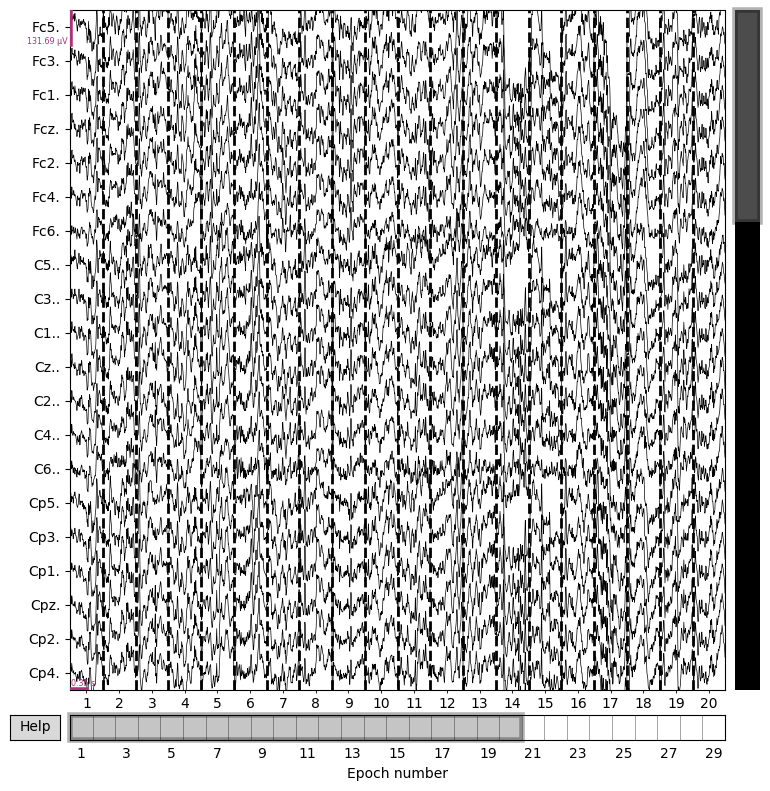

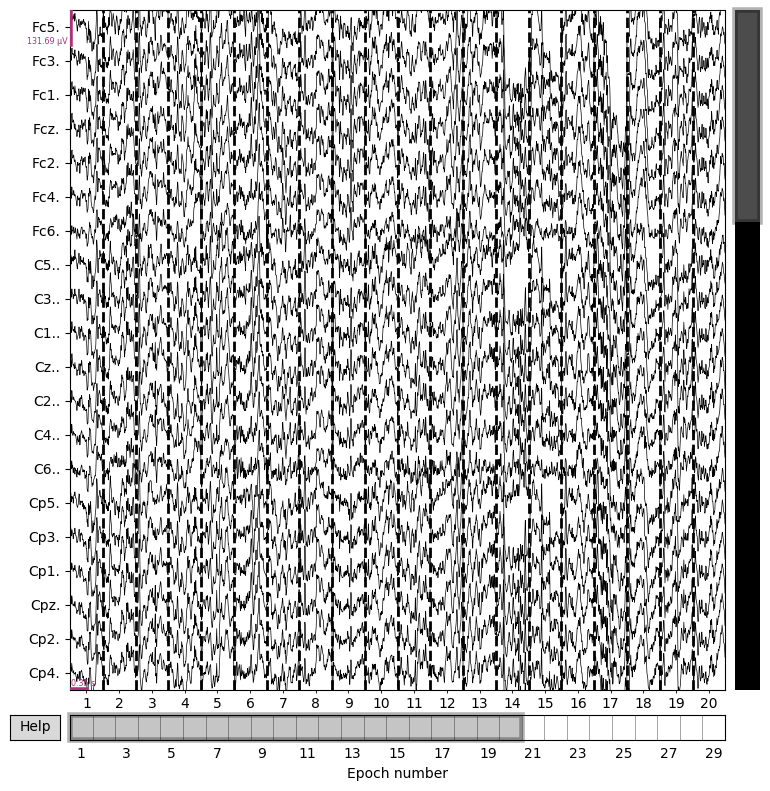

In [36]:
# This code will apply filters onto the EEG signals to extract relevant features for classification
raw_fnames = mne.datasets.eegbci.load_data(1, [3, 7])
raw = mne.io.read_raw_edf(raw_fnames[0], preload=True)
original_raw = raw.copy()

# We want to remove high frequency noise above 50hz
original_raw.filter(l_freq= None, h_freq = 50.0)

# We want to remove slow drifts below 0.1hz
original_raw.filter(l_freq = 0.1, h_freq = None)

# We want to remove power line noise at 50Hz and 60Hz
original_raw.notch_filter(freqs = [50, 60])


# Finally, we will pick only the EEG channels for further processing
original_raw.pick("eeg")

# Split into different epochs based on events
events, event_id = mne.events_from_annotations(original_raw)
original_raw = mne.Epochs(original_raw)

# Plot the processed signals
original_raw.plot(scalings = "auto")

In [37]:
class EEGClassifier:
    def __init__(self):
        self.model = LinearDiscriminantAnalysis()
        self.is_trained = False

    def fit(self, X, y):
        """Train the model"""
        self.model.fit(X, y)
        self.is_trained = True

    def predict(self, X):
        """Predict labels for new data"""
        if not self.is_trained:
            raise RuntimeError("Model must be trained before prediction.")
        return self.model.predict(X)

    def evaluate(self, X, y_true):
        """Evaluate accuracy on a dataset"""
        y_pred = self.predict(X)
        acc = np.mean(y_pred == y_true)
        print(f"Accuracy: {acc * 100:.2f}%")
        return acc

In [ ]:
x = np.array([
    [0.12, 0.56, 0.46, 0.3],
    [0.19, 0.98, 0.67, 0.28],
    [0.25, 0.30, 0.55, 0.31],
    [0.41, 0.80, 0.65, 0.27]
])

y = np.array([1, 1, 0, 0])

model = EEGClassifier()
model.fit(x, y)
model.evaluate(x, y)

Accuracy: 75.00%


0.75